Testing Pelican Observations

In [1]:
from gym_plark.envs import plark_env_non_image_state
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

env = plark_env_non_image_state.PlarkEnvNonImageState(config_file_path='/Components/plark-game/plark_game/game_config/10x10/panther_easy_TEST_Observation.json',random_panther_start_position=True)



INFO:gym_plark.envs.plark_env_non_image_state:non image kwargs: {'random_panther_start_position': True, 'image_based': False}


0
1
2


Initial observation: [10. 10. 36.  5.  5.  0.  0.  1.  1. 36. 36.  0.  1.  1.  1.  1.  0. 36.
 36.]
Taking action: 5
Got obs: [10. 10. 36.  4.  4.  0.  0.  1.  1. 36. 36.  0.  1.  1.  1.  1.  0. 36.
 36.]
Reward: 0


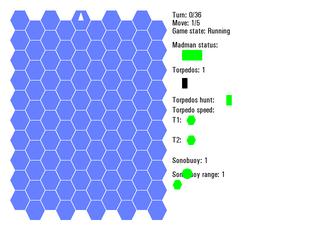

Taking action: 3
Got obs: [10. 10. 36.  3.  4.  1.  0.  1.  1. 36. 36.  0.  1.  1.  1.  1.  0. 36.
 36.]
Reward: 0


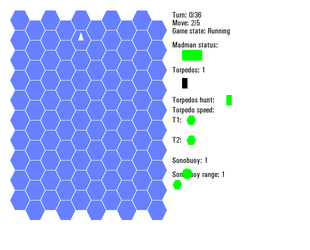

Taking action: 5
Got obs: [10. 10. 36.  2.  3.  0.  0.  1.  1. 36. 36.  0.  1.  1.  1.  1.  0. 36.
 36.]
Reward: 0


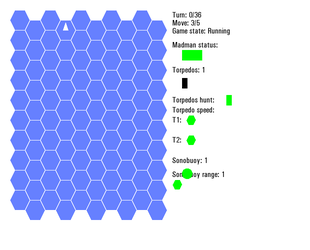

Taking action: 4
Got obs: [10. 10. 36.  1.  2.  1.  0.  1.  1. 36. 36.  0.  1.  1.  1.  1.  0. 36.
 36.]
Reward: 0


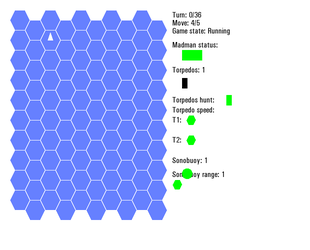

Taking action: 4
Got obs: [10. 10. 35.  5.  1.  1.  0.  1.  1. 36. 36.  0.  1.  1.  1.  1.  0. 36.
 36.]
Reward: 0


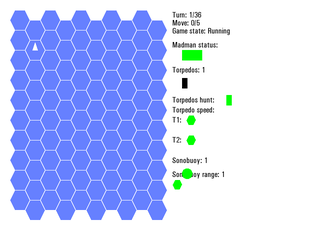

In [2]:
import random
ob = env.reset()
print("Initial observation: {}".format(ob))
for j in range(5):
    action = random.randrange(7)
    print("Taking action: {}".format(action))
    ob, reward, done, info = env.step(action)
    print("Got obs: {}".format(ob))
    print("Reward: {}".format(reward))
    display(env.render())

In [3]:
observation_space = env.observation_space
observation_space.shape[0]

19

In [8]:
obs = env.reset()
len(obs)

19

In [ ]:
import helper
import datetime
import os
from stable_baselines import PPO2
from stable_baselines.common.env_checker import check_env

env.reset()
check_env(env)
#model = helper.make_new_model("PPO2", "MlpPolicy", env)
model = PPO2('MlpPolicy', env)


In [ ]:
model.learn(200)


In [ ]:
video_path = '/data/test_video/'
os.makedirs(video_path, exist_ok=True)
video_path =  os.path.join(video_path, 'test_non_image_train.mp4')
basewidth,hsize = helper.make_video(model,env,video_path)

In [ ]:
import io
import base64
from IPython.display import HTML
video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" width="'''+str(basewidth)+'''" height="'''+str(hsize)+'''" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))